In [5]:
import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/incarceration_trends.csv')

In [8]:
df.head()

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,3413,NaN,NaN,15.0,10726,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,3451,NaN,NaN,24.0,11290,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,3625,NaN,NaN,31.0,12283,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,3747,NaN,NaN,41.0,13118,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,3791,NaN,NaN,49.0,13738,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
alameda = df[df.county_name=='Alameda County']

In [15]:
import altair as alt
from vega_datasets import data

source = data.disasters.url

alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
    alt.Y('Entity:N'),
    alt.Size('Deaths:Q',
        scale=alt.Scale(range=[0, 4000]),
        legend=alt.Legend(title='Annual Global Deaths')
    ),
    alt.Color('Entity:N', legend=None)
).properties(
    width=450,
    height=320
).transform_filter(
    alt.datum.Entity != 'All natural disasters'
)

ModuleNotFoundError: No module named 'vega_datasets'

In [86]:
deer = df[df.county_name=='Deer Lodge County']

In [62]:
crimes = [
    'violent_crime',
    'property_crime',
    'murder_crime',
    'robbery_crime',
    'agr_assault_crime',
    'burglary_crime',
    'larceny_crime',
    'mv_theft_crime',
    'arson_crime'
]

In [87]:
source = pd.melt(deer, id_vars=['year'], value_vars=crimes, var_name='Crime', value_name='Number')

In [55]:
# Function to reformat race crime labels
def label_crimes(row):
    if row['Crime'] == 'violent_crime':
        return 'Violent crime'
    if row['Crime'] == 'property_crime':
        return 'Property crime'
    if row['Crime'] == 'murder_crime':
        return 'Murder'
    if row['Crime'] == 'robbery_crime':
        return 'Robbery'
    if row['Crime'] == 'agr_assault_crime':
        return 'Aggravated assault'
    if row['Crime'] == 'burglary_crime':
        return 'Burglary'
    if row['Crime'] == 'larceny_crime':
        return 'Larceny'
    if row['Crime'] == 'mv_theft_crime':
        return 'Motor vehicle theft'
    if row['Crime'] == 'arson_crime':
        return 'Arson'

In [88]:
source['Crime'] = source.apply (lambda row: label_crimes(row), axis=1)

In [89]:
source.head()

,year,Crime,Number
0,1970,Violent crime,NaN
1,1971,Violent crime,NaN
2,1972,Violent crime,NaN
3,1973,Violent crime,NaN
4,1974,Violent crime,NaN


In [90]:
source['Number'].max()

524.0

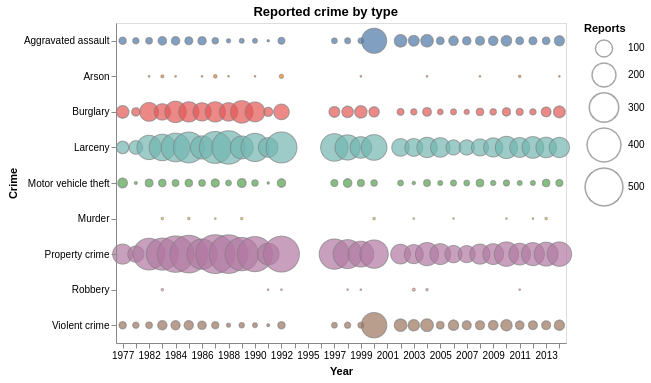

In [99]:
alt.Chart(source, width=450, height=320).mark_circle(
    opacity=0.7,
    stroke='grey',
    strokeWidth=1
).encode(
    alt.X('year:O', axis=alt.Axis(labelAngle=0, title='Year')),
    alt.Y('Crime:N'),
    alt.Size('Number:Q',
        scale=alt.Scale(range=[0, 1500]), 
        legend=alt.Legend(title='Reports')
    ),
    alt.Color('Crime:N', legend=None)
).properties(
    title='Reported crime by type'
)